# Valores perdidos e Imputación

Los valores perdidos son unos de los problemas más comunes que hay en el análisis de datos real, puesto que casi todos los datasets reales presentan valores que se ignoran, o no se anotan, o se comenten errores y se llenan mal, entre otras formas de no obtener la información. 

Al ser un problema muy frecuente, es de gran importancia en el manejo de los datos. A continuación veremos en primer lugar las clases de valores perdidos que se pueden presentar y por otro lado algunas técnicas que sirven para tratar éste problema. Nos centraremos especialmente en una técnica denominada **imputación**, que consiste en reconstruir los valores perdidos observando el resto del dataset (observando sólo una variable o múltiples variables). 

Es muy importante aclarar que no existe la forma perfecta de manejar el problema de los valores perdidos, hay muchos tipos de soluciones y dependerá de la estructura de los datos y el tipo de problema, en encontrar una solución adecuada. 

## Suposiciones de (por qué) los valores (están) perdidos

Como en muchos tipos de modelos realizar ciertas suposiciones simplifica el manejo que se le puede dar a los datos y así a la construcción de métodos que nos ayudan a solucionar el problema.

En el caso de los valores perdidos veremos tres suposiciones de por qué los valores están perdidos. 

### Missing Completely at Random (MCAR) 

*Missing Completely at Random* (MCAR), traducido sería algo como "perdido completamente de forma aleatoria",  supone que el hecho de que falte un determinado valor no tiene nada que ver con su valor hipotético ni tampoco con los valores de otras variables. De una forma más estadística, sería plantear que $\color{green}{M_{Y} \perp Y, X}$, siendo $M_Y$ una variable indicadora que indica cuando un valor es perdido (1 cuando es perdido, o 0 cuando es observado). Más formalmente, lo anterior es equivalente a: 

$$
\operatorname{Pr}(Y=y, X=x)=\operatorname{Pr}\left(Y=y, X=x \mid M_{Y}=0\right)
$$

Entonces, cualquier cosa que podamos identificar a partir de los datos completos (porque es una función de la distribución conjunta) es también algo que podemos identificar a partir de la distribución con los datos incompletos (después de eliminarlos).

MCAR es la suposición más fuerte y la menos creíble en situaciones reales. 

#### Ejemplo MCAR:
Se imprimió una tabla de datos sin valores perdidos y alguien accidentalmente dejó caer un poco de tinta sobre ella, por lo que algunas celdas ya no se pueden leer. Aquí, podríamos suponer que los valores perdidos siguen la misma distribución que los valores conocidos.

### Missing at Random (MAR)

*Missing at Random* (MAR) significa que la probabilidad de perderse un dato no está relacionada con los datos perdidos, sino con algunos de los datos observados.

Debido a que MCAR es una suposición tan fuerte e inverosímil, se ha buscado suposiciones más débiles. MAR supone que:
$$
M_{Y} \perp Y \mid X
$$
Según la definición de independencia condicional, esto equivale a decir que, para todos los $x, y$
$$
\operatorname{Pr}\left(Y=y \mid X=x, M_{Y}=0\right)=\operatorname{Pr}\left(Y=y \mid X=x, M_{Y}=1\right)
$$
En otras palabras: dado $X$, los valores perdidos de $Y$ siguen exactamente la misma distribución de probabilidad que los valores observados. O lo mismo que:
$$
\operatorname{Pr}(Y=y \mid X=x)=\operatorname{Pr}\left(Y=y \mid X=x, M_{Y}=0\right)
$$
Por lo tanto, bajo MAR, cualquier función de la distribución condicional de datos completos se puede calcular directamente a partir de la distribución condicional observada. 

#### Ejemplos MAR:
- En el caso de un sensor de temperatura, el hecho de que falte un valor no depende de la temperatura, pero puede depender de algún otro factor, por ejemplo, de la carga de la batería del termómetro.

- Si alguien responde o no a una pregunta en una encuesta, por ejemplo, ¿cuál es su edad? no depende de la respuesta en sí, sino que puede depender de la respuesta a otra pregunta, por ejemplo, el sexo.

### Missing Not At Random (MNAR)

Lo opuesto a *missing-at-random* es, naturalmente, *missing-not-at-random*, o MNAR:

$$
M_{Y} \not \perp Y \mid X
$$

En otras palabras, la probabilidad de que un valor esté perdido puede depender del valor de la misma variable.

MNAR también recibe los nombres de *non-ignorable-missingness* o *informative-missingness* (algo así como: "los valores perdidos son informativos")

Cuando los valores perdidos son informativos, los argumentos de antes, usados en MAR nos dicen que la eliminación de los valores perdidos es una mala idea. Específicamente,

$$
\operatorname{Pr}(Y=y \mid X=x) \neq \operatorname{Pr}\left(Y=y \mid X=x, M_{Y}=0\right)
$$

Es decir que, los datos observados no siguen la misma distribución condicional que los datos completos, y la eliminación de los valores perdidos nos dará una idea sesgada y sistemáticamente distorsionada de esa distribución condicional.

Hay muy poco más que se pueda decir a este nivel de generalidad en el MNAR. En particular, si bien la ausencia es informativa, puede o no, ser muy informativa. 

#### Ejemplo MNAR
- En el caso de un sensor de temperatura, el sensor no funciona correctamente cuando hace menos de 5°C.
- Si alguien responde o no a una pregunta en una encuesta, por ejemplo, el número de días de enfermedad - depende de la respuesta en sí misma - como podría ser para algunas personas con sobrepeso.

## Métodos para tratar con los valores perdidos (además de eliminarlos)

Se pueden utilizar algunos métodos para tratar los datos perdidos, ya sea que asumamos MAR o MNAR (aunque darán respuestas diferentes en los dos casos). Los más importantes son:

- Reconstruir o imputar valores para las variables con valores perdidos y analizar el conjunto de datos completo;

- Promediar el logaritmo de la función de verosimilitud sobre todos los valores posibles de las variables con valores perdidos, utilizando el algoritmo EM;

- Ponderación de las observaciones completas, de modo que el punto que consideremos apropiado represente los valores que se perdieron.

Nos centraremos particularmente en la **imputación**. Si desean conocer con más profundidad los otros métodos les recomiendo el ápendice $\text{I}$ de [éste libro](http://www.stat.cmu.edu/~cshalizi/ADAfaEPoV/) (del cual he tomado varias cosas).

La siguiente figura, tomada [de aquí](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4) muestra algunos métodos para borrar elementos o realizar imputación. 

<img src="https://miro.medium.com/max/875/1*_RA3mCS30Pr0vUxbp25Yxw.png" width="500">

Nota: por ahora, no veremos (en detalle) los métodos para tratar con valores perdidos en las series temporales.

Siguiendo con la clasificación de los métodos, presentada anteriormente, a continuación se describen los métodos de eliminación y de imputación.

### Métodos de eliminación

Hay tres enfoques de eliminación comunes: eliminación por lista, eliminación por pares y características de eliminación.

- *Listwise Deletion*: elimine todas las filas en las que falten uno o más valores.
- *Pairwise Deletion*: elimine solo las filas que tienen valores perdidos en las columnas utilizadas para el análisis. Solo se recomienda utilizar este método si los datos que faltan son MCAR.
- *Dropping Features*: elimine columnas enteras con más valores perdidos que un umbral determinado, por ejemplo, 60%.

La siguiente figura muestra un esquema de ejemplo para cada uno de los enfoques de eliminación.

<img src="img/missing-values.jpg" width="500">


### Métodos de Imputación

La idea detrás del método de imputación es reemplazar los valores perdidos con otros valores. Debido a que siempre se pierde información cuando se descartan muestras (filas) o entidades completas (columnas), la imputación suele ser un método muy valorado.

Las numerosas técnicas de imputación se pueden dividir en dos subgrupos: imputación única e imputación múltiple.

En la **imputación única** (*single imputation*), se genera un valor de imputación único / uno para cada una de las observaciones perdidas. El valor imputado se trata como el valor real, ignorando el hecho de que ningún método de imputación puede proporcionar el valor exacto. Por lo tanto, la imputación única no refleja la incertidumbre de los valores perdidos.

En la **imputación múltiple** (*multiple imputation*), se generan muchos valores imputados para cada una de las observaciones perdidas. Esto significa que se crean muchos conjuntos de datos completos con diferentes valores imputados. El análisis (por ejemplo, entrenar una regresión lineal para predecir una columna de destino) se realiza en cada uno de estos conjuntos de datos y se infieren los resultados (por ejemplo, a través del promedio). La creación de imputaciones múltiples, a diferencia de las imputaciones únicas, explica la incertidumbre estadística en las imputaciones.

#### Imputación Única

La mayoría de los métodos de imputación son métodos de imputación única, siguiendo tres estrategias principales: 
- reemplazo por valores existentes,
- reemplazo por valores estadísticos y,
- reemplazo por valores predichos.

Dependiendo de los valores usados para cada una de estas estrategias, usamos métodos que funcionan solo con valores numéricos y métodos que funcionan con columnas tanto numéricas como categóricas. Estos métodos se resumen en la siguiente Tabla  y se explican a continuación.

| Reemplazo mediante:    | Sólo descriptores numéricos | Descriptores numéricos y categóricos |
|---------------------------|--------------------------------------------------------------------------|--------------------------------|
| Valores existentes   | Mínimo / Máximo                                                        | Anterior / Posterior / Fijo        |
| Valores estadísticos | (Redondeado) Media / Mediana / Moving Average, Interpolación Lineal / Interpolación promedio | Más frecuente |
|  Valores predichos   | Algoritmos de regresión                                                    | Algoritmos de regresión y clasificación, k-Nearest Neighbours |


**Valor fijo**

La imputación de valor fijo es un método general que funciona para todos los tipos de datos y consiste en sustituir el valor perdido por un valor fijo. Como ejemplo del uso de la imputación de valor fijo en descriptores categóricos, se puede imputar los valores perdidos en una encuesta con "no respondido".

**Valor mínimo / máximo**

Si se sabe que los datos deben ajustarse a un rango determinado [mínimo, máximo], y si sabe por el proceso de recopilación de datos que el sistema de medición deja de registrar y la señal se satura más allá de uno de esos límites, puede utilizar el rango mínimo o máximo como valor de reemplazo para los valores perdidos. Por ejemplo, si en el intercambio monetario se ha alcanzado un precio mínimo y el proceso de cambio se ha detenido, el precio de cambio monetario perdido puede reemplazarse con el valor mínimo de la frontera de cambio de la ley.

**Media (redondeada) / Mediana / Media móvil**

Otros métodos de imputación comunes para descriptores numéricos son: la media, la mediana o  la media móvil (moving average). En este caso, el método sustituye el valor perdido con la media o la mediana para todo el conjunto de datos. La media móvil se calcula en una ventana cercana al valor perdido, pero se suele usar más en series temporales.  En el caso de una gran cantidad de valores atípicos en su conjunto de datos, se recomienda utilizar la mediana en lugar de la media.

**Valor más frecuente**

Otro método común que funciona tanto para descriptores numéricos como categóricos, es usar el valor más frecuente en la columna para reemplazar los valores perdidos.

**Valor anterior / siguiente**

Existen métodos especiales de imputación para series de tiempo o datos ordenados. Estos métodos tienen en cuenta la naturaleza ordenada del conjunto de datos, donde los valores cercanos son probablemente más similares que los valores distantes. Un enfoque común para imputar valores perdidos en series de tiempo sustituye el valor anterior o siguiente por el valor perdido en la serie de tiempo. Este enfoque funciona tanto para valores numéricos como categóricos.

**Interpolación lineal / promedio**

De manera similar a la imputación de valor anterior / siguiente, pero solo aplicable a valores numéricos, es la interpolación lineal o promedio, que se calcula entre el valor disponible anterior y siguiente, y sustituye el valor perdido. Por supuesto, como para todas las operaciones con datos ordenados, es importante ordenar los datos correctamente por adelantado, por ejemplo, en el caso de datos de series de tiempo usando un *timestamp*.

**K Nearest Neighbors**

La idea aquí es buscar las K muestras más cercanas en el dataset, donde para el descriptor en cuestión, no se encuentre perdido su valor. Luego, se toma el valor del descriptor que ocurre con mayor frecuencia en dicha vecindad, como reemplazo del valor perdido.

**Predicción del valor perdido**

Otra opción común para la imputación única es entrenar un modelo de aprendizaje automático para predecir los valores de imputación para el descriptor $x$ en función de los otros descriptores. Las filas sin valores perdidos en el descriptor $x$ se utilizan como un conjunto de entrenamiento y el modelo se entrena en función de los valores de las otras columnas. Aquí podemos usar cualquier modelo de clasificación o regresión, dependiendo del tipo de datos del descriptor. Después del entrenamiento, el modelo se aplica a todas las muestras con valores perdidos del descriptor en cuestión, para predecir su valor más probable.

En el caso de valores perdidos en más de una columna de descriptores, todos los valores perdidos se imputan primero temporalmente con un método de imputación básico, por ejemplo, el valor medio. A continuación, los valores de una sola columna vuelven a perderse. Posteriormente, el modelo se entrena y se aplica para completar esos valores perdidos. De esta manera, se entrena un modelo para cada descriptor con valores perdidos, hasta que todos los valores perdidos sean imputados por un modelo.

#### Imputación Múltiple

La imputación múltiple es un enfoque de imputación derivado de la estadística. Los métodos de imputación única tienen la desventaja de que no consideran la incertidumbre de los valores imputados. Esto significa que reconocen los valores imputados como valores reales sin tener en cuenta el error estándar, lo que provoca sesgos en los resultados.

Un enfoque que resuelve este problema es la imputación múltiple donde no se crea una, sino muchas imputaciones para cada valor perdido. Esto significa completar los valores perdidos varias veces, creando múltiples conjuntos de datos “completos”.

Se han desarrollado varios algoritmos para la imputación múltiple. Un algoritmo bien conocido es la [imputación múltiple por ecuación encadenada](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/) (MICE: Multiple Imputation by Chained Equation).

**Imputación múltiple por ecuaciones encadenadas (MICE)**

MICE es un método robusto e informativo para tratar los valores perdidos en los conjuntos de datos. MICE opera bajo el supuesto de que los datos faltantes son *Missing At Random*(MAR) o *Missing Complete At Random* (MCAR).

El procedimiento es una extensión de la imputación simple por $\text{predicción del valor perdido} (visto anteriormente): este es el paso 1. Sin embargo, hay dos pasos adicionales en el procedimiento de MICE.

- Paso 1. Este proceso es el mismo que en en el procedimiento de imputación por $\text{predicción del valor perdido} en un subconjunto de los datos originales. Un modelo se entrena para predecir los valores perdidos en un descriptor, utilizando los otros descriptores en la fila de datos como variables independientes para el modelo. Este paso se repite para todas los descriptores. Este paso es una iteración.

- Paso 2: El paso 1 se repite $k$ veces, utilizando cada vez las imputaciones más recientes para las variables independientes, hasta que se alcanza la convergencia. La mayoría de las veces es suficiente con $k = 10$ iteraciones.

- Paso 3: Todo el proceso se repite $N$ veces en $N$ subconjuntos aleatorios diferentes (¡similar a boostrap!). Los $N$ modelos resultantes serán ligeramente diferentes y producirán $N$ predicciones ligeramente diferentes para cada valor perdido.

El análisis, por ejemplo, a través del entrenamiento de una regresión lineal para una variable objetivo, ahora se realiza en cada uno de los $N$ conjuntos de datos finales. Finalmente, los resultados se combinan, a esto se le suele llamar *pooling*.

Este método proporciona resultados más sólidos que con una sola imputación. Por supuesto, la desventaja de tal robustez es el aumento de la complejidad computacional.

## Implementaciones del manejo de valores perdidos

In [27]:
import pandas as pd
from numpy import mean, std, isnan, nan
from sklearn.ensemble import RandomForestClassifier

# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa

from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("data/horse-colic.csv", na_values="?")
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [7]:
df.shape[0]

300

#### Eliminación de filas/columnas

Luego podemos enumerar cada columna e informar el número de filas con valores perdidos para la columna.

In [16]:
df.isna().sum()

surgery                    1
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    247
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    1
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

Podríamos eliminar todas las filas con valores perdidos usando `df.dropna()`

In [8]:
len(df),len(df.dropna())

(300, 6)

Lo cual es absolutamente excesivo. 

Podríamos también eliminar las columnas con al menos un valor perdido:

In [9]:
df.dropna(axis=1).shape

(300, 7)

Lo cual también es exagerado ya que pasamos de 28 columnas a 7.

Podríamos intentar varias formas de disminuir esto, por ejemplo, eliminando columnas con alta nulidad, o mediante un umbral. Para esto, podríámos realizar un FOR o usar el parámetro `thresh` de `df.dropna()`. También, podríamos usar algún criterio para eliminar columnas, por ejemplo, eliminar columnas que tengan una varianza baja (usando `sklearn.feature_selection.VarianceThreshold`). O también, eliminar columnas con muy pocos valores, o que tengan muchos valores duplicados. En definitiva, pueden usar múltiples criterios de eliminación dependiendo de alguna condición.

Para las imputaciones que vienen a continuación es importante disponer de los datos X y la variable respuesta Y, en forma de array (no en dataframe).

In [17]:
data = df.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# imprime el total de perdidos
print('Missing: %d' % sum(isnan(X).flatten()))

Missing: 1605


#### Imputación única con `sklearn.impute.SimpleImputer`

Seguramente han usado `df.fill()`, que es sencillo y fácil de ejecutar, pero tiene un problema muy grande: ¿cómo aplicamos exactamente la misma transformación a nuevos datos?. Es por esta razón, que es muy recomendable usar *transformers* de scikit-learn, tal y como se hace cuando se ejecuta una estandarización o se entrena un modelo. 

Realicemos una estrategia de imputación única con la media y apliquemosla a los datos

In [13]:
imputer = SimpleImputer(strategy='mean')

Xtrans = imputer.fit_transform(X) # Ajusta y transforma

In [18]:
# imprime el numero de valores perdidos
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 0


Es buena práctica evaluar la imputación (en este caso única) mediante la combinación con un modelo. Para esto, realizaremos un `Pipeline`, en donde el primer paso es la imputación y el segundo paso es el modelo. Posteriormente, haremos una validación cruzada (repetida) para evaluar el modelo

In [20]:
# definiendo el pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

In [21]:
# definiendo la evaluacion del modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluando el modelo
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.854 (0.051)


Ahora podemos comparar diferentes métodos de imputación para este mismo tipo de modelo 

>mean 0.854 (0.057)
>median 0.868 (0.056)
>most_frequent 0.872 (0.060)
>constant 0.873 (0.050)


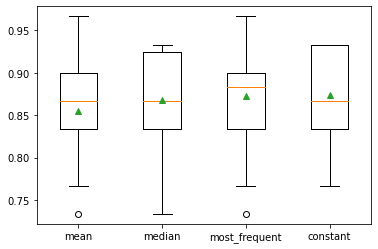

In [23]:
# evalua cada estrategia en el dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
	# crea el pipeline
	pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
	# evalua el modelo
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# almacena resultados
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# grafica el desempeno del modelo para hacer una comparacion
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

Ahora veamos como se realiza una predicción con el mejor método

In [26]:
# crea el pipeline
pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='constant')), ('m', RandomForestClassifier())])
# entrena el modelo 
pipeline.fit(X, y)
# definimos un nuevo dato
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]
# hacemos la prediccion
yhat = pipeline.predict([row])
# imprimimos la prediccion
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


#### Imputación (múltiple) con `sklearn.impute.IterativeImputer`


----
There are many well-established imputation packages in the R data science ecosystem: Amelia, mi, mice, missForest, etc. missForest is popular, and turns out to be a particular instance of different sequential imputation algorithms that can all be implemented with `IterativeImputer` by passing in different regressors to be used for predicting missing feature values. In the case of missForest, this regressor is a Random Forest. 

In the statistics community, it is common practice to perform multiple imputations, generating, for example, $m$ separate imputations for a single feature matrix. Each of these $m$ imputations is then put through the subsequent analysis pipeline (e.g. feature engineering, clustering, regression, classification). The m final analysis results (e.g. held-out validation errors) allow the data scientist to obtain understanding of how analytic results may differ as a consequence of the inherent uncertainty caused by the missing values. The above practice is called multiple imputation.

Our implementation of `IterativeImputer` was inspired by the R MICE package (Multivariate Imputation by Chained Equations) 1, but differs from it by returning a single imputation instead of multiple imputations. However, `IterativeImputer` can also be used for multiple imputations by applying it repeatedly to the same dataset with different random seeds when `sample_posterior=True`. 

It is still an open problem as to how useful single vs. multiple imputation is in the context of prediction and classification when the user is not interested in measuring uncertainty due to missing values.

---
[Esto fue tomado de la documentación de scikit-learn](https://scikit-learn.org/stable/modules/impute.html)

A continuación, realizaremos una imputación "múltiple" mediante regresión Bayesiana con regularización Ridge (`BayesianRidge()`). Usaremos el mismo procedimiento que se uso para la imputación única, esto es, construir un pipeline con un modelo de Random Forest.

In [28]:
# definiendo el modelo pipeline
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# definiendo la evaluacion del modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluando el modelo
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.870 (0.053)


Sin embargo, no sabemos si la estrategia iterativa por defecto en la mejor.

De forma predeterminada, la imputación se realiza en orden ascendente desde la característica con menos valores perdidos hasta la característica con más. Esto tiene sentido, ya que queremos tener datos más completos cuando llega el momento de estimar los valores perdidos para las columnas donde faltan la mayoría de los valores.
No obstante, podemos experimentar con diferentes estrategias de orden de imputación, descending, right-to-left (Arabic), left-to-right (Roman), y random.

A continuación se evalúa y se compara cada configuración de orden de imputación disponible.

>ascending 0.867 (0.054)
>descending 0.869 (0.051)
>roman 0.877 (0.054)
>arabic 0.871 (0.058)
>random 0.870 (0.054)


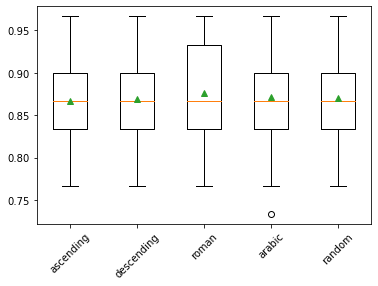

In [29]:
# evalua cada estrategia sobre el dataset
results = list()
strategies = ['ascending', 'descending', 'roman', 'arabic', 'random']
for s in strategies:
	# crea el pipeline
	pipeline = Pipeline(steps=[('i', IterativeImputer(imputation_order=s)), ('m', RandomForestClassifier())])
	# evalua el modelo
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# almacena resultados
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# grafica la comparacion entre configuraciones
plt.boxplot(results, labels=strategies, showmeans=True)
plt.xticks(rotation=45)
plt.show()

De forma predeterminada, `IterativeImputer` repetirá el número de iteraciones 10 veces.

Es posible que una gran cantidad de iteraciones comience a sesgar la estimación y que se prefieran pocas iteraciones. El número de iteraciones del procedimiento se puede especificar mediante el argumento `max _iter`.

Puede ser interesante evaluar diferentes números de iteraciones. A continuación, compararemos diferentes valores para "max_ iter" de 1 a 20.

>1 0.867 (0.053)
>2 0.870 (0.050)
>3 0.868 (0.053)
>4 0.871 (0.048)
>5 0.872 (0.057)
>6 0.872 (0.055)
>7 0.876 (0.052)
>8 0.864 (0.053)
>9 0.871 (0.057)
>10 0.873 (0.052)
>11 0.874 (0.054)
>12 0.874 (0.048)
>13 0.869 (0.056)
>14 0.860 (0.058)
>15 0.872 (0.054)
>16 0.873 (0.049)
>17 0.873 (0.053)
>18 0.871 (0.054)
>19 0.872 (0.054)
>20 0.872 (0.056)


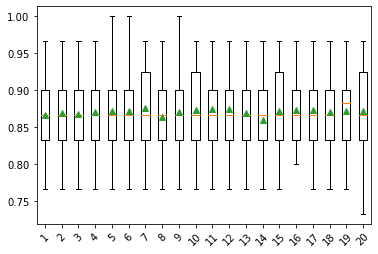

In [30]:
# evalua cada estrategia sobre el dataset
results = list()
strategies = [str(i) for i in range(1, 21)]
for s in strategies:
	# pipeline
	pipeline = Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))), ('m', RandomForestClassifier())])
	# evaluacion
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# resultados
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# grafica de la comparacion
plt.boxplot(results, labels=strategies, showmeans=True)
plt.xticks(rotation=45)
plt.show()

Realicemos ahora una predicción para un nuevo dato:

In [33]:
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, \
       3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]

In [34]:
#  pipeline
pipeline = Pipeline(steps=[('i', IterativeImputer()), ('m', RandomForestClassifier())])
# entrenamiento 
pipeline.fit(X, y)
# haciendo la prediccion
yhat = pipeline.predict([row])
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


### Otras formas de realizar imputación

scikit-learn también implementa la imputación por vecino más cercanos al usar [`sklearn.impute.KNNImputer`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute).

Otra librería que implementa más métodos de los vistos aquí es [faceimpute](https://github.com/iskandr/fancyimpute). La desventaja es que requiere a tensorflow (que es una librería grande).

# Ejercicio

1. Repita la imputación realizada para el dataset `horse-colic.csv` usando `KNNImputer`, variando el número de vecinos. Pruebe con el nuevo dato.

2. Repita el proceso de aplicar `IterativeImputer` pero esta vez usando `GridSearchCV` y variando una combinación entre la estrategia y el número de iteraciones máximo. Evalúe en el nuevo dato.

3. En el dataset trabajado las variables categóricas ya han sido convertidas a enteros (además que se están realizando predicciones no enteras de los valores perdidos). Realice una imputación (única y/o múltiple)  sobre el dataset original `horse.csv` separando la estrategia de imputación dependiendo del tipo de variable. Al final, debe producir un dataframe con los datos imputados adecuadamente. Sugerencia: vea la primera y segunda respuesta de este [link](https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn).